# Pressure and Density

#### Overview:
In this notebook, we will examine how to compute pressure and density using output from an ocean model.

#### Import modules
Begin by importing modules to conduct calculations and make plots.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In addition, import the `gsw` package to make oceanographic calculations:

In [4]:
import gsw

## Pressure

#### Definition
Pressure at a given depth $z$ in the ocean can be computed as: 
$$
p = \int_{-z}^{z_{surface}} \rho(z) g \, dz
$$

In this equation, we see that pressure is dependent on $\rho$, which is itself a function of depth. Recall that density is also a function of both temperature and salinity - this is the equation of state.

## Example Profiles:
To work through an example of computing density and pressure from ocean model output, we'll look at an example profile in the tropical Pacific. Read in the example profiles provided in the dataset posted with this notebook:

In [5]:
# read in the data
ds = xr.open_dataset('Pacific_Profile.nc')
Z = np.array(ds['Z'][:])
dZ = np.array(ds['dZ'][:])
Theta = np.array(ds['Theta'][:])
Salt = np.array(ds['Salt'][:])
ds.close()

Then, plot the profiles vertically:

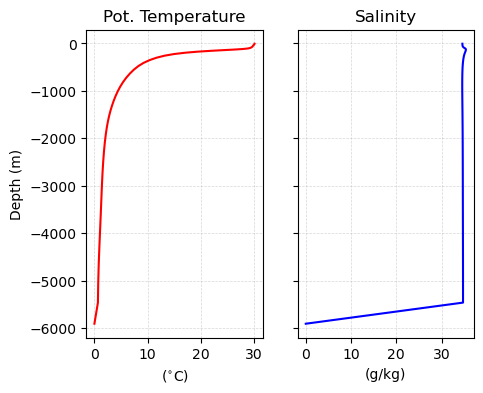

In [6]:
fig = plt.figure(figsize=(5,4))

plt.subplot(1,2,1)
plt.plot(Theta, Z, 'r-')
plt.ylabel('Depth (m)')
plt.xlabel('($^{\circ}$C)')
plt.title('Pot. Temperature')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)

plt.subplot(1,2,2)
plt.plot(Salt, Z, 'b-')
plt.title('Salinity')
plt.xlabel('(g/kg)')
plt.gca().set_yticklabels([])
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)

plt.show()

#### &#x1F914; Questions for consideration:
How do we expect density to vary with depth?

## Computing Density
The equation of state gives

$$
\rho = f(S, \Theta, p)
$$

That is, $\rho$ is a function of salinity ($S$), temperature ($\Theta$) *and* pressure ($p$). So we're in quite the predicament - to compute pressure, we need density, but to compute density, we need pressure!

To make things a little simpler, we can use an initial approximation for pressure when computing density using the equation of state. The reason this is a good approximation is that density is not sensitive to small perturbations in density.

Let's compute density with the `gsw` toolbox:

In [9]:
# the density equation needs an initial estimate of pressure
# a basic approximation can be obtained by gsw with 
# an estimate based on latitude
latitude = 0
pressure_estimate = gsw.p_from_z(Z, latitude)

# then, density can be computed with the pressure estimate
density = gsw.rho(Salt, Theta, pressure_estimate)

The documentation for the `gsw` package can be found [HERE](https://teos-10.github.io/GSW-Python/). 

With the density in hand, let's plot the profile:

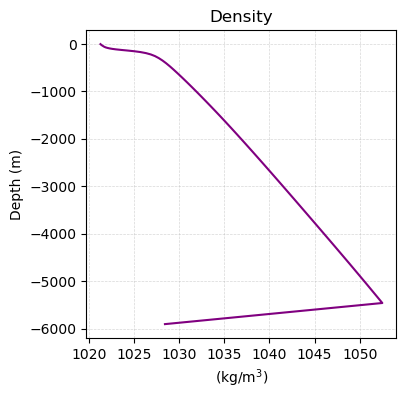

In [10]:
fig = plt.figure(figsize=(4,4))

plt.plot(density, Z, '-', color='purple')
plt.ylabel('Depth (m)')
plt.xlabel('(kg/m$^3$)')
plt.title('Density')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)

plt.show()

## Compute Pressure
The pressure equation for pressure at a given depth $z$

$$
p(z) = \int_{-z}^{z_{surface}} \rho(z) g dz
$$

can be estimated numerically using

$$
p(x) \approx \sum_k \rho(z)g\Delta z
$$

where the $k$ indices are the sum are the layers from the current depth to the surface. For example, in the surface cell ($k=0$) there are no cells above and the sum is 0; in the next cell deeper ($k=1$) there is one cell above; etc.

Using this information, write a loop to compute a profile of pressure using the profile of density computed above.

In [11]:
# make an empy array the same size as the density array
pressure = np.zeros((len(density),))

# define g
g = 9.81

# write a loop (or two) to compute the pressure profile
for i in range(1, len(density)):
    pressure[i] = pressure[i-1] + dZ[i-1]*density[i-1]*g

Once you have your pressure integrated, make a plot like the one for density above:

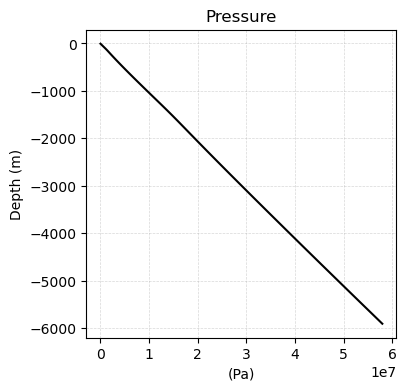

In [12]:
fig = plt.figure(figsize=(4,4))

plt.plot(pressure, Z, '-', color='k')
plt.ylabel('Depth (m)')
plt.xlabel('(Pa)')
plt.title('Pressure')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)

plt.show()

Next, convert your pressure to units of decibars. 

In [13]:
# convert to decibars
pressure_dbar = pressure/10000


Then, make a plot:

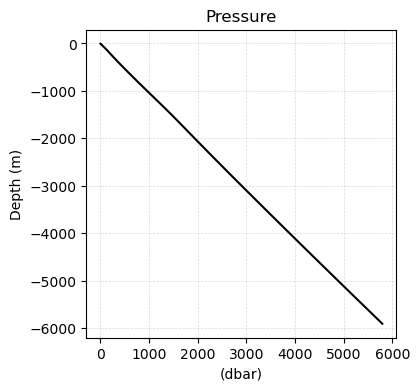

In [14]:
fig = plt.figure(figsize=(4,4))

plt.plot(pressure_dbar, Z, '-', color='k')
plt.ylabel('Depth (m)')
plt.xlabel('(dbar)')
plt.title('Pressure')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)

plt.show()

#### &#x1F914; Questions for consideration:
1. How does the magnitude of pressure expressed in decibars compare to depth?
2. How many meters of water equal the total weight of the atmosphere?